In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

def my_reducer(a):
    return pd.to_datetime(a[0])

reducer = np.vectorize(my_reducer)

In [2]:
spy = pd.read_csv('/Users/arkilic/Desktop/spy.csv', 
                      header=0, sep=' ')
spy_design = pd.read_csv('/Users/arkilic/Desktop/spy_design.csv', 
                         header=0, sep=' ',  parse_dates=True)
spy_indices = spy.index.values
spy_design_indices = spy_design.index.values


spy_indexes = reducer(spy_indices)
spy['TIME'] = spy_indexes

spy_design_indexes = reducer(spy_design_indices)
spy_design['TIME'] = spy_design_indexes

spy = spy.set_index('TIME')
spy_design = spy_design.set_index('TIME')

In [3]:
spy_data = spy.ix[:, 1:6]
spy_data.head()

,SPY.Open,SPY.High,SPY.Low,SPY.Close,SPY.Volume
TIME,,,,,
2008-01-02 09:31:00,146.535,146.645,146.535,146.645,591203.0
2008-01-02 09:32:00,146.645,146.685,146.635,146.685,385457.0
2008-01-02 09:33:00,146.685,146.775,146.680,146.775,343700.0
2008-01-02 09:34:00,146.725,146.755,146.705,146.725,863418.0
2008-01-02 09:35:00,146.705,146.775,146.685,146.775,457500.0


In [4]:
spy_design_data = spy_design.ix[:, 1:7]
spy_design_data.head()


spy = spy_data
spy_design = spy_design_data

In [5]:
spy_data.shape

(625425, 5)

In [6]:
spy_design.shape

(625425, 6)

In [7]:
spy_design.head()

,returns,returns.WA5,variance,skew,hurst,rets_var
TIME,,,,,,
2008-01-02 09:31:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2008-01-02 09:32:00,0.707107,0.707107,0.707107,-0.707107,0.000000,0.707107
2008-01-02 09:33:00,1.034910,1.031794,1.027297,-0.901304,0.000000,1.133169
2008-01-02 09:34:00,-1.177622,-0.712844,1.407897,1.277819,0.000000,-1.366479
2008-01-02 09:35:00,0.451147,-0.181499,0.593341,-1.669053,-1.788854,0.854902


In [8]:
spy_design.tail()

,returns,returns.WA5,variance,skew,hurst,rets_var
TIME,,,,,,
2014-05-19 15:57:00,-0.361859,-0.367870,-0.336626,-0.155008,-0.222009,-0.112141
2014-05-19 15:58:00,-0.089936,-0.485638,-0.486350,-0.094171,-0.222009,-0.084080
2014-05-19 15:59:00,0.723983,-0.039040,-0.553366,-0.023248,-0.517930,-0.062958
2014-05-19 16:00:00,-3.813061,-3.754974,0.954806,-0.023248,0.503982,-2.193333
2014-05-19 16:01:00,-0.077985,-3.885884,-0.627748,-0.023248,0.987273,-0.077476


In [9]:
def diff_xts(x_ts, lag=1, differences=1, arithmetic=True):
    # Uses something along the lines of numpy.diff for lag
    """
    Parameters
    ----------
    x_ts: pd.DataFrame
        Raw data
    lag: int
        period to difference over
    differences: int
        order of differencing
    arithmetic: bool
        should arithmetic or geometric differencing be used
    """
    if lag != 1:
        raise NotImplementedError('Period other than 1 has not beein implemented yet')
    res = np.zeros(x_ts.shape[0])
    res[1:] = np.diff(x_ts.ix[:, 1])
    return  res# vectorized diff over given period

In [10]:
# def run_returns(x_ts, col_umn = 3, scale=True, lag=1):
#     if len(x_ts.columns) == 7:
#         re_turns = 0.5 * (x_ts[:]["Bid.Price"] + x_ts[:]["Ask.Price"])
#     else:
#         re_turns = x_ts[x_ts.columns[::ol_umn]]
    
#     re_turns = np.log(re_turns)
#     re_turns = diff_xts(re_turns, lag=lag)
#     if scale:
#         a = np.multiply(np.diff(x_ts.index.values), 10e-10)
#         print(a)
# #         factor = np.concatenate((np.ones(lag), ))
        

In [11]:
def run_returns(x_ts, col_umn = 3):
    if len(x_ts.columns) == 7:
        re_turns = 0.5 * (x_ts[:]["Bid.Price"] + x_ts[:]["Ask.Price"])
    else:
        re_turns = x_ts['SPY.Close']
    return re_turns

In [12]:
np.multiply(np.diff(spy.index.values), 10e-10).shape

(625424,)

In [13]:
run_returns(spy).head()

TIME
2008-01-02 09:31:00    146.645
2008-01-02 09:32:00    146.685
2008-01-02 09:33:00    146.775
2008-01-02 09:34:00    146.725
2008-01-02 09:35:00    146.775
Name: SPY.Close, dtype: float64

In [14]:
re_turns = run_returns(spy)
logged_re_turns = np.log(re_turns)
logged_re_turns.head()
intermediate = np.diff(logged_re_turns)

In [15]:
intermediate = np.concatenate(([0], intermediate))
inx = np.array(spy.index.values, dtype=np.float64)

In [16]:
inx = np.array(np.multiply(np.diff(spy.index.values), 10e-10), dtype=np.float64)

In [17]:
inx = np.concatenate(([60], inx))

In [18]:
print(inx.shape)
returns_running = intermediate / inx

(625425,)


In [19]:
# def lag_xts(x_ts, k=-1, **kwargs):
#     n_rows = x_ts.shape[0]
#     fir_st = x_ts[0]
#     la_st = x_ts[n_rows-1]
#     x_ts = x_ts.shift(periods=k, **kwargs)
#     if (k > 0):
#         print(fir_st)
#         x_ts[0:k] = fir_st
#     else:
#         x_ts[n_rows-1] = la_st
#     return x_ts

In [20]:
def lag_xts(x_ts):
    tmp = x_ts[1:]
    return tmp

In [21]:
returns_advanced = lag_xts(returns_running)
# returns_advanced.name = 'returns_advanced'
print(returns_advanced[:10])

[  4.54550623e-06   1.02228586e-05  -5.67859176e-06   5.67859176e-06
  -4.54271862e-06  -1.59092729e-05  -3.41110657e-06   1.47764223e-05
   9.08667575e-06   2.27089508e-06]


In [23]:
# betas_running <- roll_pcr(x=SPY_design["2011/2012", ], 
#                           y=returns_advanced["2011/2012", ], 
#                           width=1*60, comps=1:1, min_obs=1)
# x = spy_design['2008': '2008']
# y = returns_advanced['2011': '2012']

x = spy_design.ix[:625325, :]
y =  returns_advanced[:625325]


print(spy_design.head())
print(x.shape)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

%matplotlib inline

                      returns  returns.WA5  variance      skew     hurst  \
TIME                                                                       
2008-01-02 09:31:00  0.000000     0.000000  0.000000  0.000000  0.000000   
2008-01-02 09:32:00  0.707107     0.707107  0.707107 -0.707107  0.000000   
2008-01-02 09:33:00  1.034910     1.031794  1.027297 -0.901304  0.000000   
2008-01-02 09:34:00 -1.177622    -0.712844  1.407897  1.277819  0.000000   
2008-01-02 09:35:00  0.451147    -0.181499  0.593341 -1.669053 -1.788854   

                     rets_var  
TIME                           
2008-01-02 09:31:00  0.000000  
2008-01-02 09:32:00  0.707107  
2008-01-02 09:33:00  1.133169  
2008-01-02 09:34:00 -1.366479  
2008-01-02 09:35:00  0.854902  
(625325, 6)


**roll_pcr(x, y, width, comps = 1:ncol(x), weights = rep(1, width),
  center = TRUE, scale = FALSE, min_obs = width, complete_obs = TRUE,
  na_restore = FALSE, parallel_for = c("rows", "cols"))
Arguments
x
matrix or xts object. Rows are observations and columns are the independent variables.
y
matrix or xts object. Rows are observations and column is the dependent variable.
width
integer. Window size.
comps
integer vector. Select a subset of principal components.
weights
vector. Weights for each observation within a window.
center
logical. If TRUE then the weighted mean of each variable is used, if FALSE then zero is used.
scale
logical. If TRUE then the weighted standard deviation of each variable is used, if FALSE then no scaling is done.
min_obs
integer. Minimum number of observations required to have a value within a window, otherwise result is NA.
complete_obs
logical. If TRUE then rows containing any missing values are removed, if FALSE then pairwise is used.
na_restore
logical. Should missing values be restored?
parallel_for
character. Executes a "for" loop in which iterations run in parallel by rows or cols.
Value
A list containing the following components:
coefficientsAn object of the same class and dimension as x with the rolling coefficients.
r.squaredAn object of the same class as x with the rolling r-squareds.



**The PCR method may be broadly divided into three major steps:**

1.) 
\;\; Perform PCA on the observed data matrix for the explanatory variables to obtain the principal components, and then (usually) select a subset, based on some appropriate criteria, of the principal components so obtained for further use.

2.) 
\;\; Now regress the observed vector of outcomes on the selected principal components as covariates, using ordinary least squares regression (linear regression) to get a vector of estimated regression coefficients (with dimension equal to the number of selected principal components).

3.) 
\;\; Now transform this vector back to the scale of the actual covariates, using the selected PCA loadings (the eigenvectors corresponding to the selected principal components) to get the final PCR estimator (with dimension equal to the total number of covariates) for estimating the regression coefficients characterizing the original model.


In [26]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pca = PCA(n_components=2)
cls = LinearRegression(n_jobs=8) 

pipe = Pipeline([('pca', pca), ('linear', cls)])

In [27]:
target = np.asarray(y, dtype=np.float64)

In [28]:
pipe.fit(x, y)

Pipeline(steps=[('pca', PCA(copy=True, n_components=2, whiten=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False))])

In [29]:
# features_valid = spy_design['2012':]
features_valid = spy_design.ix[625325:, :]
real_target = returns_advanced[625325:]
# real_target = returns_advanced['2012':]

In [30]:
# r = pipe.predict(spy_design['2012':])
r = pipe.predict(spy_design.ix[625325:, :])

In [31]:
print(len(r))
print(len(x))
pipe.score(x, y)


100
625325


6.1948154935098643e-05

In [36]:
ratio_v = r[:99]/real_target[:99]
#fig, ax = plt.subplots()
#ax.plot(ratio_v)
#ax.plot(real_target[:500])
direction_v = np.sum(ratio_v>0.)
print(direction_v)
direction_v*1.0/800

58


0.072499999999999995

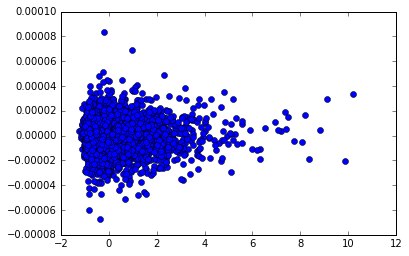

In [37]:
plt.plot(spy_design.ix[:5000, 2], y[:5000], 'o')

In [38]:
spy_design.shape

(625425, 6)

In [39]:
spy_design0 = spy_design.ix[:50000,:]
spy_design0['y'] = y[:50000]

//anaconda/envs/dev/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [40]:
pd.DataFrame.corr(spy_design0)

,returns,returns.WA5,variance,skew,hurst,rets_var,y
returns,1.000000,0.417326,0.001088,0.109742,-0.007126,0.721140,-0.011078
returns.WA5,0.417326,1.000000,-0.007556,0.069680,0.005936,0.399558,-0.010944
variance,0.001088,-0.007556,1.000000,-0.019290,0.047379,0.011204,0.010851
skew,0.109742,0.069680,-0.019290,1.000000,-0.000791,0.211901,-0.004558
hurst,-0.007126,0.005936,0.047379,-0.000791,1.000000,-0.005015,-0.002745
rets_var,0.721140,0.399558,0.011204,0.211901,-0.005015,1.000000,-0.001353
y,-0.011078,-0.010944,0.010851,-0.004558,-0.002745,-0.001353,1.000000


In [165]:
pca = PCA(n_components=5)
cls = LinearRegression(n_jobs=8) 

pipe = Pipeline([('linear', cls)])

In [167]:
pipe.fit(x, y)
r = pipe.predict(spy_design.ix[66999:, :])

In [168]:
ratio_v = r[:800]/real_target[:800]
#fig, ax = plt.subplots()
#ax.plot(ratio_v)
#ax.plot(real_target[:500])
direction_v = np.sum(ratio_v>0.)
print(direction_v)
direction_v*1.0/800

398


0.4975